# Analisi Comparativa degli Algoritmi di Ordinamento:
## Insertion Sort vs Bucket Sort
<style>
h1, h2, h3, h4, h5, h6, p, li {
    margin-top: 0.2em !important;
    margin-bottom: 0.2em !important;
    line-height: 1.1 !important;
}
</style>


### Obiettivo del Progetto

L'obiettivo di questo studio è quello di **analizzare e confrontare le prestazioni di due algoritmi di ordinamento**, ovvero **Insertion Sort** e **Bucket Sort**, al variare della dimensione dell’input.

Vedremo in quali condizioni ciascun algoritmo è più efficiente, eseguendo test su array di numeri reali generati casualmente con varie distribuzioni e dimensioni.

### Metodologia

Per effettuare l’analisi sono stati seguiti i seguenti passi:

1. **Implementazione degli algoritmi:** Insertion Sort e Bucket Sort (che utilizza a sua volta Insertion Sort per ordinare i bucket).
2. **Generazione dei dati di input:** array di numeri reali casuali compresi tra 0 e 1.
3. **Definizione delle dimensioni degli array di test:** sono stati creati 100 array di dimensioni equidistanti tra 1 e 20.000.
4. **Misurazione del tempo di esecuzione:** misurati con _time.perf_counter()_ per maggiore precisione.
5. **Visualizzazione dei risultati:** mediante grafico con smoothing per confrontare l'andamento dei tempi.

### Insertion Sort

**Insertion Sort** è un algoritmo di ordinamento semplice e intuitivo che costruisce la sequenza ordinata un elemento alla volta. Ad ogni iterazione, l'elemento corrente viene confrontato con quelli già ordinati (a sinistra) e inserito nella posizione corretta.

**Funzionamento**:
1. Si parte dal secondo elemento dell’array.
2. Si confronta con gli elementi precedenti.
3. Si spostano a destra gli elementi più grandi.
4. L’elemento viene inserito nella posizione corretta.

**Caratteristiche**:
- Complessità nel caso peggiore: O(n²)
- Complessità nel caso migliore: O(n) (array già ordinato)
- È **stabile** (non cambia l’ordine di elementi uguali)
- Utilizzato per piccoli dataset o array quasi ordinati

In [1]:
def insertion_sort(A, n):
    for i in range(1, n):
        key = A[i]
        j = i - 1
        while j >= 0 and key < A[j]:
            A[j + 1] = A[j]
            j -= 1
        A[j + 1] = key
    return A

### Bucket Sort

**Bucket Sort** è un algoritmo efficiente per ordinare numeri reali distribuiti uniformemente nell’intervallo [0, 1). Suddivide gli elementi in diversi "secchi" (bucket), li ordina singolarmente e poi li concatena.

**Funzionamento**:
1. Si creano `k` bucket (contenitori).
2. Gli elementi dell’array vengono distribuiti nei bucket in base al valore.
3. Ogni bucket viene ordinato (es. con Insertion Sort).
4. I bucket ordinati vengono concatenati in un array finale.

**Caratteristiche**:
- Complessità media: O(n + k), dove `k` è il numero di bucket
- Funziona bene con input distribuiti uniformemente
- Può usare qualsiasi algoritmo di ordinamento per i bucket
- È **non stabile** a meno che il metodo interno non lo sia

In [2]:
def bucket_sort(A):
    """Bucket Sort con Insertion Sort all'interno di ciascun bucket."""
    n = len(A)
    if n == 0:
        return A
    
    min_A = min(A)
    max_A = max(A)
    
    if max_A == min_A:
        return insertion_sort(A, n)
    
    # 1. Crea n bucket vuoti
    B = [[] for _ in range(n)]
    
    # 2. Normalizza i dati nell'intervallo [0, 1] e assegna ai bucket
    for i in range(n):
        norm = (A[i] - min_A) / (max_A - min_A)
        index = int(norm * (n - 1))
        B[index].append(A[i])
        
    # 3. Ordina ogni bucket con insertion sort
    for i in range(n):
        insertion_sort(B[i], len(B[i]))
        
    # 4. Concatenazione dei bucket
    result = []
    for i in range(n):
        result.extend(B[i])
    return result

### Visualizzazione dei Risultati: `plot_results`

La funzione `plot_results` è utilizzata per confrontare graficamente i tempi di esecuzione di `Insertion Sort` e `Bucket Sort` su array di varie dimensioni.

**Cosa fa la funzione:**
- Applica una **media mobile** ai tempi raccolti per ridurre il rumore statistico nei dati.
- Traccia due curve (una per ciascun algoritmo) che mostrano l'andamento del tempo di esecuzione al crescere della dimensione dell'array.
- Usa `matplotlib` per creare un grafico chiaro, con etichette, griglia e legenda.

> Questo tipo di visualizzazione è utile per osservare tendenze generali e differenze di performance in modo intuitivo.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def moving_average(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

def plot_results(sizes, insertion_times, bucket_times, smooth_window = 7):
    smoothed_insertion = moving_average(insertion_times, smooth_window)
    smoothed_bucket = moving_average(bucket_times, smooth_window)
    valid_sizes = sizes[:len(smoothed_insertion)]
    
    plt.figure(figsize=(12, 6))
    plt.plot(valid_sizes, smoothed_insertion, label='Insertion Sort')
    plt.plot(valid_sizes, smoothed_bucket, label='Bucket Sort')
    plt.xlabel('Dimensione Array')
    plt.ylabel('Tempo (s)')
    plt.title('Confronto tra Insertion Sort e Bucket Sort')
    plt.legend()
    plt.grid(True)
    plt.show()

#### Caso 1 – Array ordinato (caso migliore per Insertion Sort)
Descrizione: Array già ordinato in ordine crescente

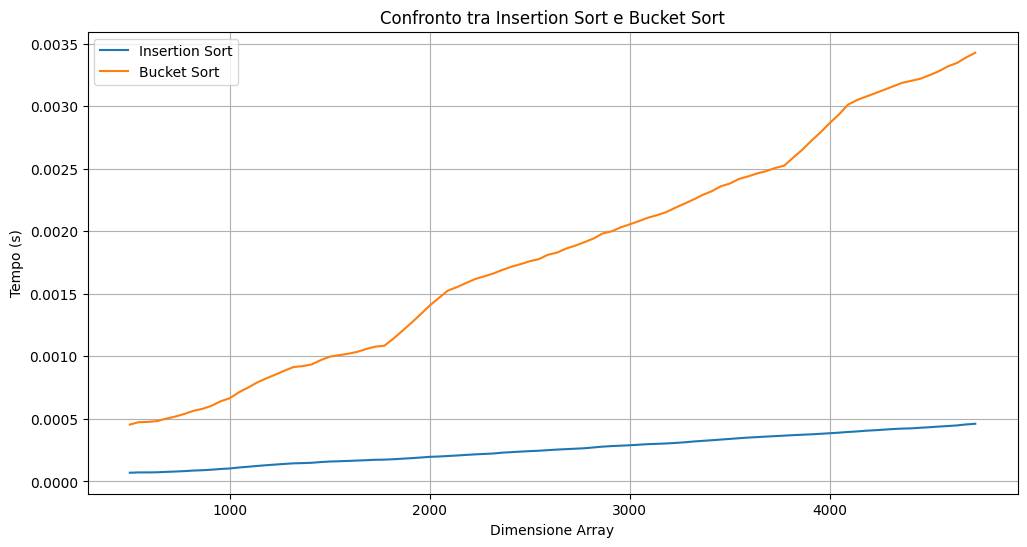

In [4]:
import time

insertion_time = []
bucket_time = []
sizes = np.linspace(500, 5000, 100, dtype=int).tolist()
num_tests = 1000

for size in sizes:
    insertion_total = 0
    bucket_total = 0
    
    for _ in range(num_tests):
        array = sorted(np.random.rand(size))

        # Insertion Sort
        start = time.perf_counter()
        insertion_sort(array.copy(), len(array))
        end = time.perf_counter()
        insertion_total += (end - start)

        # Bucket Sort
        start = time.perf_counter()
        bucket_sort(array.copy())
        end = time.perf_counter()
        bucket_total += (end - start)

    # Calcolo della media dei tempi (append una sola volta per ogni size)
    insertion_time.append(insertion_total / num_tests)
    bucket_time.append(bucket_total / num_tests)

plot_results(sizes, insertion_time, bucket_time)

### Caso 2 – Array decrescente (caso peggiore per Insertion Sort)
Descrizione: Array ordinato in ordine decrescente

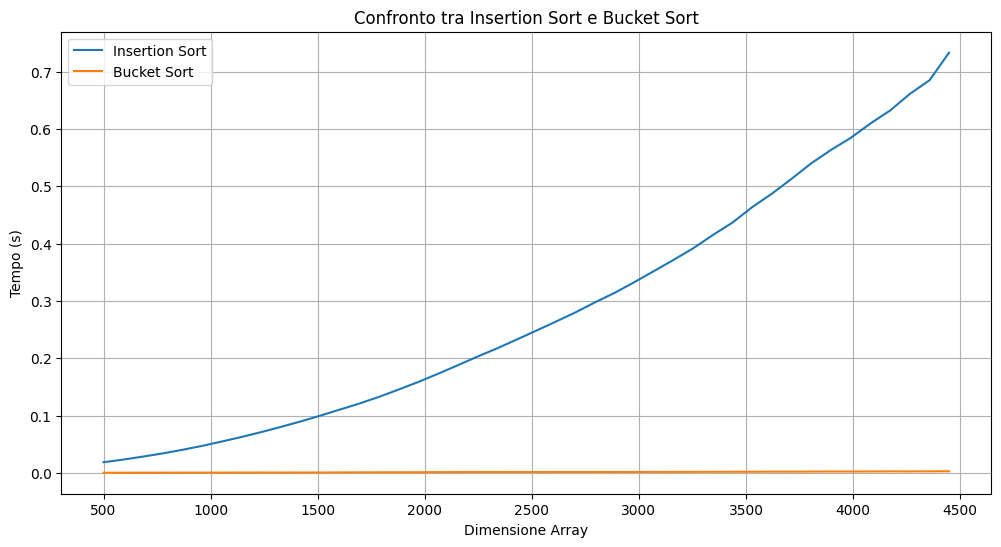

In [5]:
insertion_time = []
bucket_time = []
sizes = np.linspace(500, 5000, 50, dtype=int).tolist()
num_tests = 50

for size in sizes:
    insertion_total = 0
    bucket_total = 0
    
    for _ in range(num_tests):
        
        array = list(range(size, 0, -1))

        # Insertion Sort
        start = time.perf_counter()
        insertion_sort(array.copy(), len(array))
        end = time.perf_counter()
        insertion_total += (end - start)

        # Bucket Sort
        start = time.perf_counter()
        bucket_sort(array.copy())
        end = time.perf_counter()
        bucket_total += (end - start)

    # Calcolo della media dei tempi (append una sola volta per ogni size)
    insertion_time.append(insertion_total / num_tests)
    bucket_time.append(bucket_total / num_tests)

plot_results(sizes, insertion_time, bucket_time)


### Caso 3 – Distribuzione uniforme (caso migliore per Bucket Sort)
Descrizione: Float distribuiti equamente tra 0 e 1

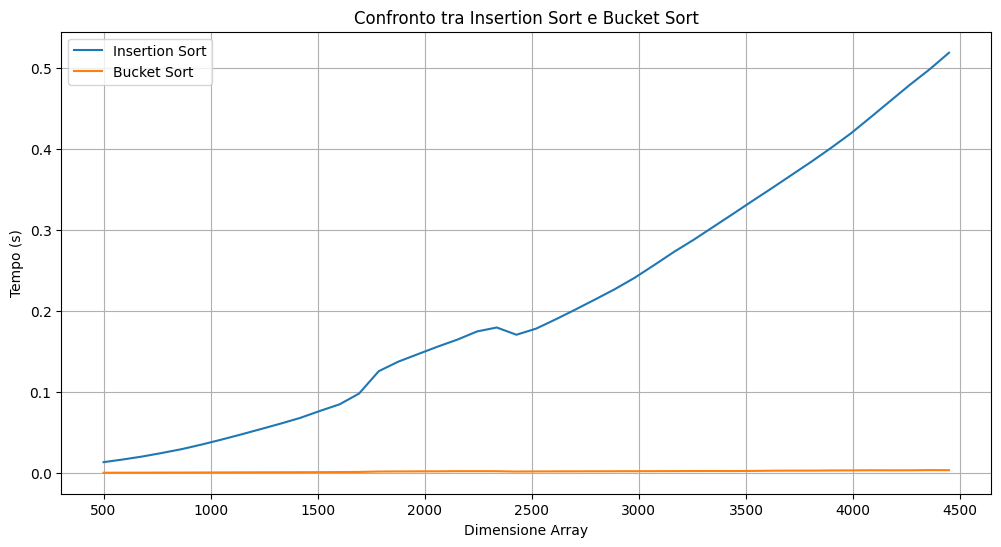

In [6]:
import random

insertion_time = []
bucket_time = []
sizes = np.linspace(500, 5000, 50, dtype=int).tolist()

num_tests = 50

for size in sizes:
    insertion_total = 0
    bucket_total = 0

    for _ in range(num_tests):
        array = np.linspace(0, 1, size).tolist()
        random.shuffle(array)
        

        # Insertion Sort
        start = time.perf_counter()
        insertion_sort(array.copy(), len(array))
        end = time.perf_counter()
        insertion_total += (end - start)

        # Bucket Sort
        start = time.perf_counter()
        bucket_sort(array.copy())
        end = time.perf_counter()
        bucket_total += (end - start)

    # Calcolo della media dei tempi (append una sola volta per ogni size)
    insertion_time.append(insertion_total / num_tests)
    bucket_time.append(bucket_total / num_tests)

plot_results(sizes, insertion_time, bucket_time)

### Caso 4 – Valori simili (caso peggiore per Bucket Sort)
Descrizione: Tutti i valori molto simili, concentrati in un unico bucket

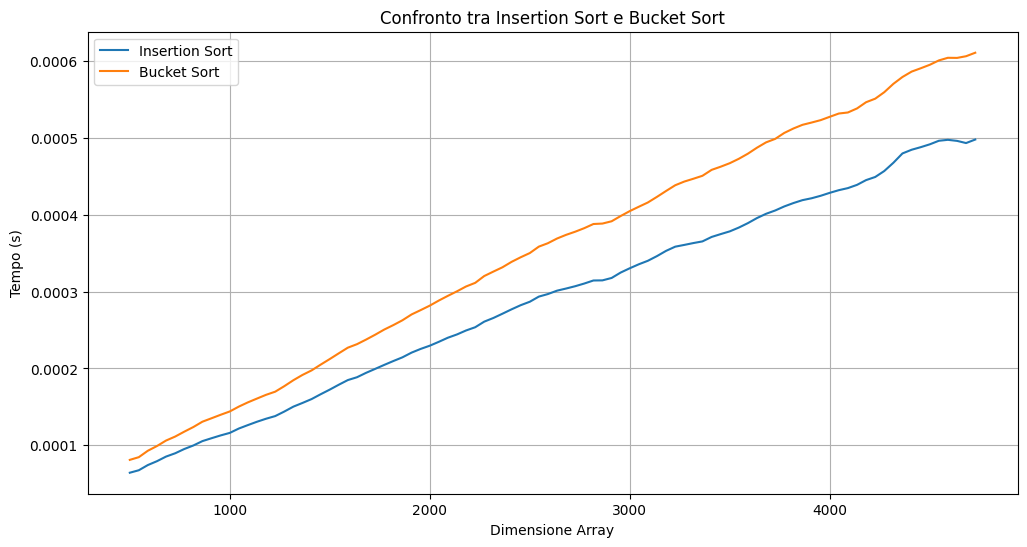

In [7]:
insertion_time = []
bucket_time = []
sizes = np.linspace(500, 5000, 100, dtype=int).tolist()

num_tests = 1000

for size in sizes:
    insertion_total = 0
    bucket_total = 0

    for _ in range(num_tests):
        array = [0.5] * size

        # Insertion Sort
        start = time.perf_counter()
        insertion_sort(array.copy(), len(array))
        end = time.perf_counter()
        insertion_total += (end - start)

        # Bucket Sort
        start = time.perf_counter()
        bucket_sort(array.copy())
        end = time.perf_counter()
        bucket_total += (end - start)

    # Calcolo della media dei tempi (append una sola volta per ogni size)
    insertion_time.append(insertion_total / num_tests)
    bucket_time.append(bucket_total / num_tests)

plot_results(sizes, insertion_time, bucket_time)

### caso 5 array ordinati casualmente

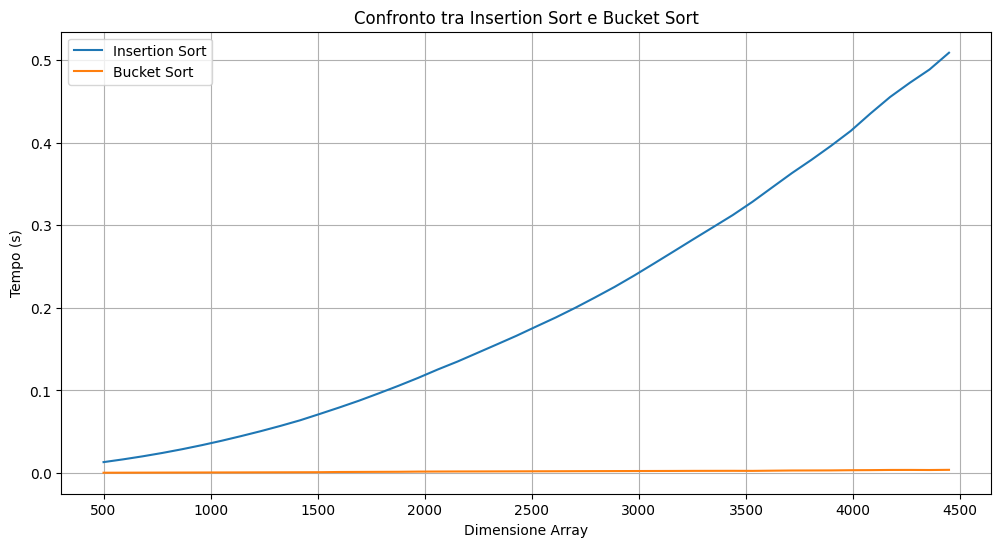

In [8]:

insertion_times = []
bucket_times = []
sizes = np.linspace(500, 5000, 50, dtype=int).tolist()
num_tests = 50

for n in sizes:

    insertion_total = 0
    bucket_total = 0
    
    for _ in range(num_tests):
        # Genera un array casuale di float tra 0 e 1
        arr = np.random.rand(n).tolist()

        # Test Insertion Sort
        arr_copy = arr.copy()
        start = time.perf_counter()
        insertion_sort(arr_copy, len(arr_copy))
        end = time.perf_counter()
        insertion_total += (end - start)

        # Test Bucket Sort
        arr_copy = arr.copy()
        start = time.perf_counter()
        bucket_sort(arr_copy)
        end = time.perf_counter()
        bucket_total += (end - start)
    
    # Calcolo della media dei tempi
    insertion_times.append(insertion_total / num_tests)
    bucket_times.append(bucket_total / num_tests)
        
plot_results(sizes, insertion_times, bucket_times)

#### Caso 6 – Array di piccole dimensioni
descrizione: utilizzo array di piccole dimensioni con valori già stabili per valutare l'efficienza dei due algoritmi

In [9]:
test_arrays = [
    list(range(1, 21)),
    list(range(20, 0, -1)),
    random.sample(range(1, 21), 20),
    [0.5]* 20,
    [random.random() for _ in range(20)]
]

for i, arr in enumerate(test_arrays, 1):
    a1 = arr.copy()
    a2 = arr.copy()

    t0 = time.perf_counter()
    insertion_sort(a1, len(a1))
    t1 = time.perf_counter()

    t2 = time.perf_counter()
    bucket_sort(a2)
    t3 = time.perf_counter()

    print(f"Test {i}: {arr}")
    print(f"  Insertion Sort tempo: {t1 - t0:.6f} s")
    print(f"  Bucket Sort tempo: {t3 - t2:.6f} s\n")


Test 1: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
  Insertion Sort tempo: 0.000008 s
  Bucket Sort tempo: 0.000033 s

Test 2: [20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
  Insertion Sort tempo: 0.000025 s
  Bucket Sort tempo: 0.000023 s

Test 3: [16, 14, 8, 2, 17, 6, 1, 13, 12, 3, 19, 20, 11, 7, 9, 4, 18, 5, 15, 10]
  Insertion Sort tempo: 0.000013 s
  Bucket Sort tempo: 0.000015 s

Test 4: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
  Insertion Sort tempo: 0.000003 s
  Bucket Sort tempo: 0.000004 s

Test 5: [0.03188716740763675, 0.2678029149935497, 0.824026315742697, 0.20955284297160826, 0.9120086601356931, 0.3428145380890538, 0.03306297628808308, 0.9716846806657933, 0.6670358048149094, 0.8338365611127676, 0.0951030493445717, 0.24086790008719627, 0.4337068690696092, 0.3183005793769359, 0.9763831562028016, 0.4120832375003022, 0.09438197490826383, 0.5651288684039868, 0.4945

**Osservazioni:**
I tempi di esecuzione sono molto bassi (nell'ordine dei microsecondi) e possono variare leggermente tra esecuzioni.
- `Bucket Sort` risulta spesso più lento a causa dell'overhead nella creazione e gestione dei bucket, che non viene compensato dalla suddivisione in sottoarray su input così piccoli.
- `Insertion Sort` è più adatto per queste dimensioni, essendo semplice e senza overhead strutturali.

> **Nota**: Un confronto grafico in questo contesto è utile solo per evidenziare il costo aggiuntivo strutturale di `Bucket Sort`, non per analisi di performance accurate.

### Risultati Sperimentali

I tempi di esecuzione sono stati raccolti per ciascuna dimensione dell’array. I risultati mostrano in modo chiaro:

- **Insertion Sort** presenta una crescita del tempo di esecuzione quadratica, diventando rapidamente inefficiente per array di grandi dimensioni.
- **Bucket Sort**, grazie alla sua struttura e all'ordinamento localizzato nei bucket, si comporta in modo molto più efficiente, soprattutto per input distribuiti uniformemente.

Il grafico risultante permette di visualizzare l’andamento dei tempi per entrambi gli algoritmi, evidenziando in quali contesti uno supera l’altro.

## Confronto tra gli Algoritmi

| Criterio                    | Insertion Sort         | Bucket Sort                       |
|-----------------------------|------------------------|-----------------------------------|
| Complessità (caso peggiore) | O(n²)                  | O(n²)                             |
| Complessità (caso medio)    | O(n²)                  | O(n + k)                          |
| Complessità (caso migliore) | O(n)                   | O(n + k)                          |
| Stabilità                   | Sì                     | Dipende dall’algoritmo interno    |
| Adatto per piccoli array    | Sì                     | Meno efficace su input piccoli    |
| Adatto per grandi array     | No                     | Sì                                |
| Richiede bucket?            | No                     | Sì                                |


### Conclusioni e Valutazione

L'analisi evidenzia che:

- **Insertion Sort** è semplice da implementare e performa bene su array piccoli o quasi ordinati.

- **Bucket Sort** è più efficiente su array di grandi dimensioni con valori distribuiti uniformemente, grazie alla sua struttura che permette un ordinamento più rapido.

In ambiti pratici, **la scelta dell’algoritmo va fatta in base alla natura e alla distribuzione dei dati**. Bucket Sort si rivela una scelta più scalabile per la maggior parte delle applicazioni reali.